In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hr_df = pd.read_csv('HR_comma_sep.csv')
hr_df.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

In [3]:
hr_df.shape

(14999, 10)

In [4]:
hr_df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Average Monthly Hours Vs Left

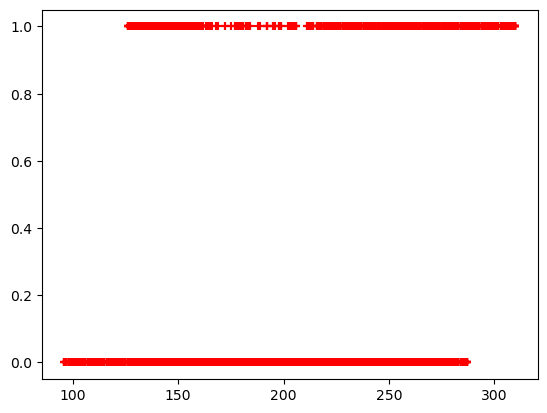

In [6]:
plt.scatter(hr_df['average_montly_hours'], hr_df['left'], color='red', marker='+')

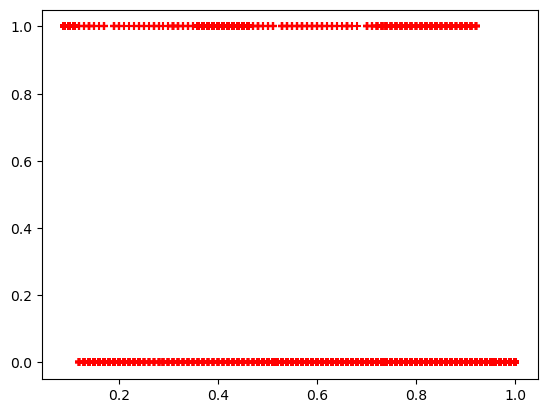

In [7]:
plt.scatter(hr_df['satisfaction_level'], hr_df['left'], color='red', marker='+')

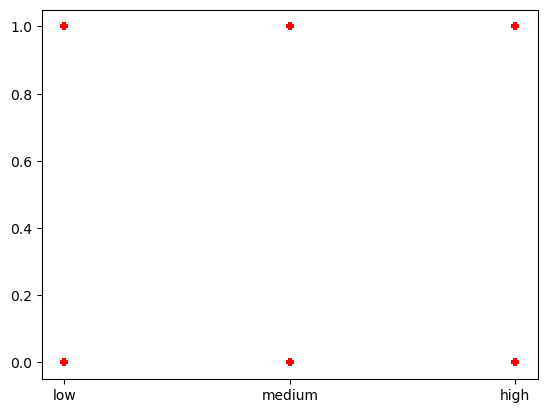

In [8]:
plt.scatter(hr_df['salary'], hr_df['left'], color='red', marker='+')

<BarContainer object of 14999 artists>

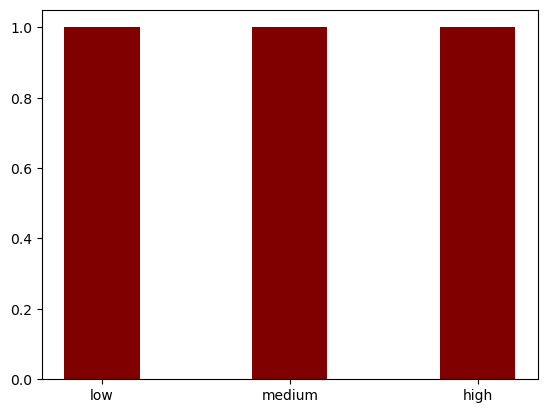

In [9]:
plt.bar(hr_df['salary'],
       hr_df['left'],
       color='maroon',
       width=0.4)

## Salary and Left Bar Chart
we use pd.crosstab to get the the double bar chart

<AxesSubplot:xlabel='salary'>

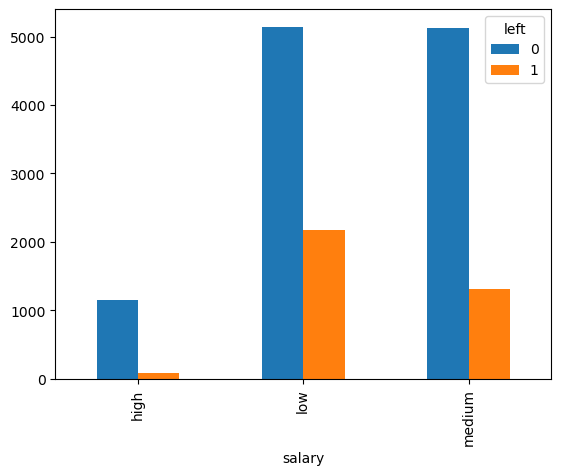

In [10]:
pd.crosstab(hr_df.salary, hr_df.left).plot(kind='bar')

## Department and Left Bar Chart

<AxesSubplot:xlabel='Department'>

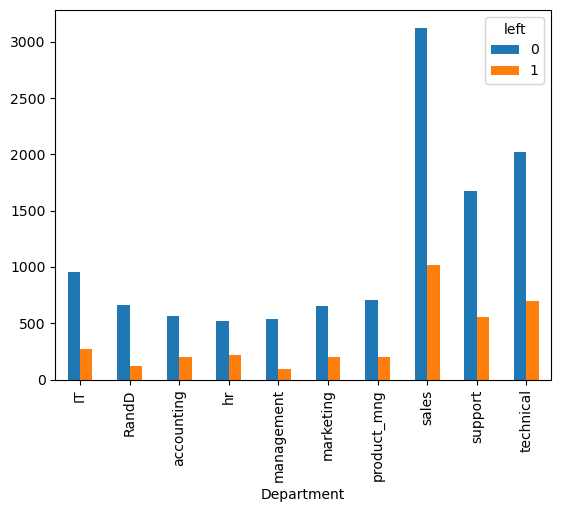

In [11]:
pd.crosstab(hr_df.Department, hr_df.left).plot(kind='bar')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
reg = LogisticRegression()

In [16]:
X = hr_df[['Department', 'salary']]
X

Department  salary
0          sales     low
1          sales  medium
2          sales  medium
3          sales     low
4          sales     low
...          ...     ...
14994    support     low
14995    support     low
14996    support     low
14997    support     low
14998    support     low

[14999 rows x 2 columns]

In [17]:
dummies = pd.get_dummies(hr_df.Department)
dummies

IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0       0      0           0   0           0          0            0      1   
1       0      0           0   0           0          0            0      1   
2       0      0           0   0           0          0            0      1   
3       0      0           0   0           0          0            0      1   
4       0      0           0   0           0          0            0      1   
...    ..    ...         ...  ..         ...        ...          ...    ...   
14994   0      0           0   0           0          0            0      0   
14995   0      0           0   0           0          0            0      0   
14996   0      0           0   0           0          0            0      0   
14997   0      0           0   0           0          0            0      0   
14998   0      0           0   0           0          0            0      0   

       support  technical  
0            0          0  
1            0          0  
2            0          0  
3            0          0  
4            0          0  
...        ...        ...  
14994        1          0  
14995        1          0  
14996        1          0  
14997        1          0  
14998        1          0  

[14999 rows x 10 columns]

In [18]:
merged = pd.concat([X, dummies], axis='columns')
merged

Department  salary  IT  RandD  accounting  hr  management  marketing  \
0          sales     low   0      0           0   0           0          0   
1          sales  medium   0      0           0   0           0          0   
2          sales  medium   0      0           0   0           0          0   
3          sales     low   0      0           0   0           0          0   
4          sales     low   0      0           0   0           0          0   
...          ...     ...  ..    ...         ...  ..         ...        ...   
14994    support     low   0      0           0   0           0          0   
14995    support     low   0      0           0   0           0          0   
14996    support     low   0      0           0   0           0          0   
14997    support     low   0      0           0   0           0          0   
14998    support     low   0      0           0   0           0          0   

       product_mng  sales  support  technical  
0                0      1        0          0  
1                0      1        0          0  
2                0      1        0          0  
3                0      1        0          0  
4                0      1        0          0  
...            ...    ...      ...        ...  
14994            0      0        1          0  
14995            0      0        1          0  
14996            0      0        1          0  
14997            0      0        1          0  
14998            0      0        1          0  

[14999 rows x 12 columns]

In [19]:
final = merged.drop(['Department', 'hr'], axis='columns')
final

salary  IT  RandD  accounting  management  marketing  product_mng  \
0         low   0      0           0           0          0            0   
1      medium   0      0           0           0          0            0   
2      medium   0      0           0           0          0            0   
3         low   0      0           0           0          0            0   
4         low   0      0           0           0          0            0   
...       ...  ..    ...         ...         ...        ...          ...   
14994     low   0      0           0           0          0            0   
14995     low   0      0           0           0          0            0   
14996     low   0      0           0           0          0            0   
14997     low   0      0           0           0          0            0   
14998     low   0      0           0           0          0            0   

       sales  support  technical  
0          1        0          0  
1          1        0          0  
2          1        0          0  
3          1        0          0  
4          1        0          0  
...      ...      ...        ...  
14994      0        1          0  
14995      0        1          0  
14996      0        1          0  
14997      0        1          0  
14998      0        1          0  

[14999 rows x 10 columns]

In [20]:
merged_two = pd.get_dummies(final['salary'])
final = pd.concat([final, merged_two], axis='columns')
final

salary  IT  RandD  accounting  management  marketing  product_mng  \
0         low   0      0           0           0          0            0   
1      medium   0      0           0           0          0            0   
2      medium   0      0           0           0          0            0   
3         low   0      0           0           0          0            0   
4         low   0      0           0           0          0            0   
...       ...  ..    ...         ...         ...        ...          ...   
14994     low   0      0           0           0          0            0   
14995     low   0      0           0           0          0            0   
14996     low   0      0           0           0          0            0   
14997     low   0      0           0           0          0            0   
14998     low   0      0           0           0          0            0   

       sales  support  technical  high  low  medium  
0          1        0          0     0    1       0  
1          1        0          0     0    0       1  
2          1        0          0     0    0       1  
3          1        0          0     0    1       0  
4          1        0          0     0    1       0  
...      ...      ...        ...   ...  ...     ...  
14994      0        1          0     0    1       0  
14995      0        1          0     0    1       0  
14996      0        1          0     0    1       0  
14997      0        1          0     0    1       0  
14998      0        1          0     0    1       0  

[14999 rows x 13 columns]

In [22]:
real_final = final.drop(['salary', 'low'], axis='columns')
real_final

IT  RandD  accounting  management  marketing  product_mng  sales  \
0       0      0           0           0          0            0      1   
1       0      0           0           0          0            0      1   
2       0      0           0           0          0            0      1   
3       0      0           0           0          0            0      1   
4       0      0           0           0          0            0      1   
...    ..    ...         ...         ...        ...          ...    ...   
14994   0      0           0           0          0            0      0   
14995   0      0           0           0          0            0      0   
14996   0      0           0           0          0            0      0   
14997   0      0           0           0          0            0      0   
14998   0      0           0           0          0            0      0   

       support  technical  high  medium  
0            0          0     0       0  
1            0          0     0       1  
2            0          0     0       1  
3            0          0     0       0  
4            0          0     0       0  
...        ...        ...   ...     ...  
14994        1          0     0       0  
14995        1          0     0       0  
14996        1          0     0       0  
14997        1          0     0       0  
14998        1          0     0       0  

[14999 rows x 11 columns]

In [24]:
X = real_final

In [25]:
y = hr_df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
reg.fit(X_train, y_train)

LogisticRegression()

In [28]:
reg.score(X_test, y_test)

0.7543333333333333

# The github solution
The github uses:

* **Statisfaction Level**
* **Average Monthly Hours**
* **Promotion Last 5 years**
* **Salary**

To determine if an employee is likely to leave. When ploting Department vs Left or Salary vs Left we were trying to visualize the impact of them. The 4 features before are more likely to determine if an employee will leave. I think it is less likely that a empoyee we leave just because of their department alone.

In [40]:
X = hr_df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
X

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                    0.38                   157                      0     low
1                    0.80                   262                      0  medium
2                    0.11                   272                      0  medium
3                    0.72                   223                      0     low
4                    0.37                   159                      0     low
...                   ...                   ...                    ...     ...
14994                0.40                   151                      0     low
14995                0.37                   160                      0     low
14996                0.37                   143                      0     low
14997                0.11                   280                      0     low
14998                0.37                   158                      0     low

[14999 rows x 4 columns]

In [41]:
dummies = pd.get_dummies(X.salary)
dummies

high  low  medium
0         0    1       0
1         0    0       1
2         0    0       1
3         0    1       0
4         0    1       0
...     ...  ...     ...
14994     0    1       0
14995     0    1       0
14996     0    1       0
14997     0    1       0
14998     0    1       0

[14999 rows x 3 columns]

In [42]:
X = pd.concat([X, dummies], axis='columns')
X = X.drop(['salary'], axis='columns')
X

satisfaction_level  average_montly_hours  promotion_last_5years  high  \
0                    0.38                   157                      0     0   
1                    0.80                   262                      0     0   
2                    0.11                   272                      0     0   
3                    0.72                   223                      0     0   
4                    0.37                   159                      0     0   
...                   ...                   ...                    ...   ...   
14994                0.40                   151                      0     0   
14995                0.37                   160                      0     0   
14996                0.37                   143                      0     0   
14997                0.11                   280                      0     0   
14998                0.37                   158                      0     0   

       low  medium  
0        1       0  
1        0       1  
2        0       1  
3        1       0  
4        1       0  
...    ...     ...  
14994    1       0  
14995    1       0  
14996    1       0  
14997    1       0  
14998    1       0  

[14999 rows x 6 columns]

In [43]:
y = hr_df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
right_reg = LogisticRegression()
right_reg.fit(X_train, y_train)

LogisticRegression()

In [53]:
right_reg.score(X_test, y_test)

0.768